In [2]:
import pandas as pd
df = pd.read_csv("df_goalkeeper_mpg_v150423.csv",index_col=0)
df =df.reset_index(drop=True)

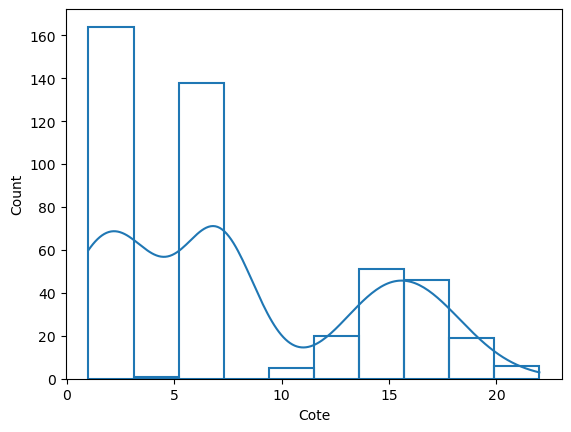

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.histplot(data=df, x='Cote',kde=True, fill=False);
#Distribution Variable cible

In [4]:
df.columns

Index(['index', 'Joueur', 'Poste', 'Cote', 'Enchère moy', 'Note', 'Note série',
       'Note 1 an', 'Nb match', 'Nb match série', 'Nb match 1 an', 'Variation',
       'Var série', 'Var 1 an', 'But', 'Buts série', 'Buts 1 an', 'Titu',
       'Titu série', 'Titu 1 an', 'Temps', 'Tps série', 'Tps 1 an', 'Tps moy',
       'Tps moy série', 'Tps moy 1 an', 'Min/But', 'Min/But 1 an',
       'Min note/but', 'Prix/but', 'Cleansheet', 'But/Peno', 'But/Coup-franc',
       'But/surface', 'Pass decis.', 'Occas° créée', 'Corner gagné', 'Passes',
       'Ballons', 'Interceptions', 'Tacles', 'Duel', 'Fautes', 'But évité',
       'Action stoppée', 'DMI', 'moy_j', 'moy_j_10', 'j-1', 'j-2', 'j-3',
       'j-4', 'j-5', 'j-6', 'j-7', 'j-8', 'j-9', 'j-10', 'j-11', 'j-12',
       'j-13', 'j-14', 'j-15', 'j-16', 'j-17', 'j-18', 'j-19', 'j-20', 'j-21',
       'j-22', 'j-23', 'j-24', 'j-25', 'j-26', 'j-27', 'j-28', 'j-29', 'j-30',
       'j-31', 'j-32', 'j-33', 'j-34', 'j-35', 'j-36', 'j-37', 'j-38',
       'Ti

In [5]:
# le fait de conserver toutes les notes par journées peut fausser l'analyse. Nous avons deja un nb de titu et des notes moyenne
# Quid de l'opportunité de conserver ces colonnes ?
df_reduce = df[['Cote', 'Note', 'Note série',
       'Note 1 an', 'Nb match', 'Nb match série', 'Nb match 1 an', 'Variation',
               'Titu', 'Titu série', 'Titu 1 an', 'Temps', 'Tps série', 'Tps 1 an', 'Tps moy',
               'Tps moy série', 'Tps moy 1 an', 'Min/But', 'Min/But 1 an',
       'moy_j', 'moy_j_10','j-1', 'j-2', 'j-3', 'j-4', 'j-5',
       'j-6', 'j-7', 'j-8', 'j-9', 'j-10', 'j-11', 'j-12', 'j-13', 'j-14',
       'j-15', 'Titu_4', 'Titu_10','Cleansheet', 
       'Pass decis.', 'Occas° créée', 'Passes', 'Ballons', 'Fautes', 'But évité',
       'Action stoppée', 'DMI']]

In [6]:
# séparer le jeu de données en 2 datasets : Gardien (df_gk) et joueur de champs (df_jc)

df_gk = df_reduce.reset_index(drop=True).copy()


In [7]:
df_gk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 47 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cote            450 non-null    float64
 1   Note            450 non-null    float64
 2   Note série      450 non-null    float64
 3   Note 1 an       450 non-null    float64
 4   Nb match        450 non-null    int64  
 5   Nb match série  450 non-null    int64  
 6   Nb match 1 an   450 non-null    int64  
 7   Variation       450 non-null    float64
 8   Titu            450 non-null    float64
 9   Titu série      450 non-null    float64
 10  Titu 1 an       450 non-null    float64
 11  Temps           450 non-null    int64  
 12  Tps série       450 non-null    int64  
 13  Tps 1 an        450 non-null    int64  
 14  Tps moy         450 non-null    float64
 15  Tps moy série   450 non-null    float64
 16  Tps moy 1 an    450 non-null    float64
 17  Min/But         450 non-null    flo

In [8]:
df_gk.head()

,Cote,Note,Note série,Note 1 an,Nb match,Nb match série,Nb match 1 an,Variation,Titu,Titu série,...,Titu_10,Cleansheet,Pass decis.,Occas° créée,Passes,Ballons,Fautes,But évité,Action stoppée,DMI
0,7.0,7.00,0.00,6.17,1,0,3,0.00,1.0,0.0,...,0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
1,7.0,6.50,0.00,5.58,1,0,13,0.00,0.0,0.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0
2,16.0,6.00,6.00,6.00,26,26,27,0.98,1.0,1.0,...,9,7.0,0.0,0.0,0.0,0.0,0.0,78.0,25.0,0.0
3,18.0,5.84,5.84,5.76,28,28,38,1.23,1.0,1.0,...,9,9.0,0.0,0.0,0.0,0.0,0.0,65.0,54.0,5.5
4,13.0,5.80,5.00,5.80,5,3,5,1.30,1.0,1.0,...,3,3.0,0.0,0.0,0.0,0.0,0.0,9.0,3.0,0.0


In [9]:
pip install pycaret

In [10]:
from pycaret.regression import *

In [11]:
# on regarde le setup pour le dataset gardien
s_gk = setup(df_gk, target = 'Cote')

,Description,Value
0,Session id,4170
1,Target,Cote
2,Target type,Regression
3,Original data shape,"(450, 47)"
4,Transformed data shape,"(450, 47)"
5,Transformed train set shape,"(315, 47)"
6,Transformed test set shape,"(135, 47)"
7,Numeric features,46
8,Preprocess,True
9,Imputation type,simple


In [12]:
# on compare les modèles et leur pertinence
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.3497,3.9702,1.9717,0.8792,0.3816,0.4754,3.0980
rf,Random Forest Regressor,1.3644,4.0517,1.9970,0.8771,0.3850,0.4925,3.1610
gbr,Gradient Boosting Regressor,1.3971,4.0813,1.9997,0.8757,0.3846,0.5037,2.6770
br,Bayesian Ridge,1.5707,4.1895,2.0400,0.8736,0.3998,0.5520,2.9260
lightgbm,Light Gradient Boosting Machine,1.4860,4.2201,2.0376,0.8710,0.3905,0.5151,3.6020
ridge,Ridge Regression,1.5415,4.2972,2.0643,0.8687,0.4015,0.5415,3.6820
en,Elastic Net,1.5999,4.4656,2.1013,0.8668,0.4013,0.5534,3.2650
omp,Orthogonal Matching Pursuit,1.5758,4.3989,2.0877,0.8668,0.4032,0.5548,2.9840
lr,Linear Regression,1.5486,4.3525,2.0771,0.8663,0.4046,0.5437,5.3440
lasso,Lasso Regression,1.6485,4.7806,2.1716,0.8576,0.4041,0.5589,2.8180


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

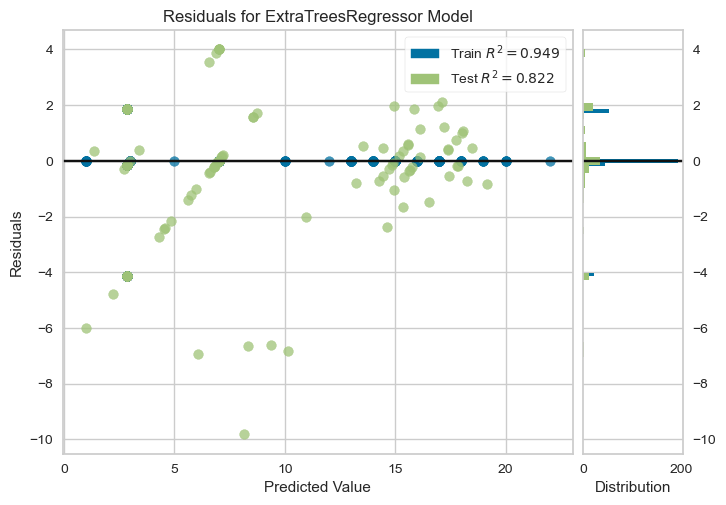

In [13]:
plot_model(best)

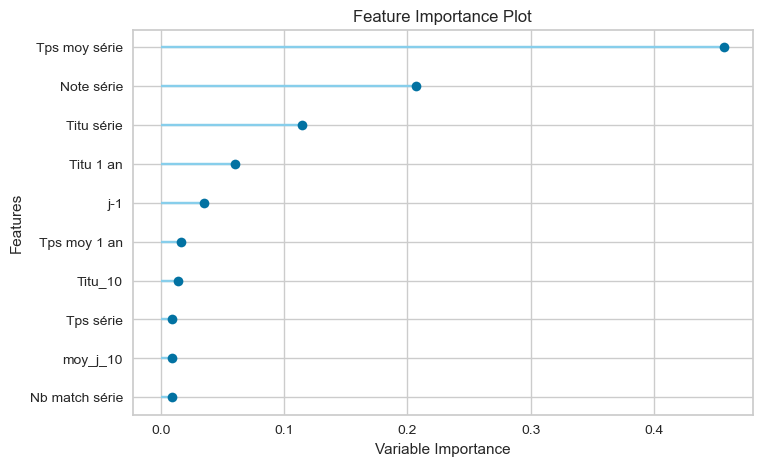

In [14]:
plot_model(best, plot = 'feature')

In [15]:
save_model(best,"MPG_model_gk_v170423")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\xavie\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Note', 'Note série', 'Note 1 an',
                                              'Nb match', 'Nb match série',
                                              'Nb match 1 an', 'Variation',
                                              'Titu', 'Titu série', 'Titu 1 an',
                                              'Temps', 'Tps série', 'Tps 1 an',
                                              'Tps moy', 'Tps moy série',
                                              'Tps moy 1 an', 'Min/But',
                                              'Min/But 1 an', 'moy_j',
                                              'moy_j_10', 'j-1', 'j-2', 'j-3',
                                              'j-4', 'j-5', 'j-6', 'j-7', 'j-8',
                                              'j-9', 'j-10', ...],
                                     trans

In [16]:
df_test = df_gk.drop('Cote', axis =1)

In [17]:
y_pred = best.predict(df_test)

In [18]:
df['cote_predite'] = y_pred

In [19]:
df['+/- value'] = df['cote_predite'] - df['Cote']

In [20]:
df.head()

,index,Joueur,Poste,Cote,Enchère moy,Note,Note série,Note 1 an,Nb match,Nb match série,...,j-33,j-34,j-35,j-36,j-37,j-38,Titu_4,Titu_10,cote_predite,+/- value
0,223,Begovic Asmir,G,7.0,8.0,7.00,0.00,6.17,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,7.00,0.00
1,224,Dúbravka Martin,G,7.0,8.0,6.50,0.00,5.58,1,0,...,8.0,6.0,6.0,6.5,2.0,6.0,0,1,5.76,-1.24
2,225,Leno Bernd,G,16.0,24.0,6.00,6.00,6.00,26,26,...,0.0,0.0,0.0,0.0,0.0,6.0,3,9,17.23,1.23
3,226,Raya David,G,18.0,24.0,5.84,5.84,5.76,28,28,...,4.0,5.5,5.5,6.0,6.5,4.5,4,9,17.83,-0.17
4,227,Steele Jason,G,13.0,13.0,5.80,5.00,5.80,5,3,...,0.0,0.0,0.0,0.0,0.0,0.0,3,3,13.00,0.00


In [21]:
# output base de données gardien avec cote
df.to_csv('df_goalkeeper_output_model_v170423.csv')